<h1>Part 2 - Visaualization and Exploratory Data Analysis</h1>

<H3>Import Library</H3>

In [4]:
import numpy as np # Data manipulation
import pandas as pd # Numerical operations
import matplotlib.pyplot as plt # Plotting and visualization
import seaborn as sns # Statistical data visualization
import warnings  # Suppress warnings
warnings.filterwarnings("ignore")

<h3>Import Data</h3>

In [6]:
# Read CSV
df = pd.read_csv('/Users/kammiehui/Jupyter Notebook/DataSet/Airbnb_Open_Data_Clean.csv')
df.head()


,id,host_identity_verified,neighbourhood_group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room_type,construction_year,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules
0,1001254,unconfirmed,Brooklyn,Kensington,40.64749,-73.97237,False,strict,Private room,2020.0,966.0,193.0,10.0,9.0,2021-10-19 00:00:00.000000000,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...
1,1002102,verified,Manhattan,Midtown,40.75362,-73.98377,False,moderate,Entire home/apt,2007.0,142.0,28.0,30.0,45.0,2022-05-21 00:00:00.000000000,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...
2,1002403,unconfirmed,Manhattan,Harlem,40.80902,-73.94190,True,flexible,Private room,2005.0,620.0,124.0,3.0,0.0,2019-06-10 18:47:53.419776768,1.00,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and..."
3,1002755,unconfirmed,Brooklyn,Clinton Hill,40.68514,-73.95976,True,moderate,Entire home/apt,2005.0,368.0,74.0,30.0,270.0,2019-07-05 00:00:00.000000000,4.64,4.0,1.0,322.0,No specific rules provided
4,1003689,verified,Manhattan,East Harlem,40.79851,-73.94399,False,moderate,Entire home/apt,2009.0,204.0,41.0,10.0,9.0,2018-11-19 00:00:00.000000000,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th..."


In [7]:
df = df.astype({'cancellation_policy':'category','room_type':'category','host_identity_verified':'category', 'review_rate_number':'category', 'neighbourhood_group':'category'})
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')


<h3>Data Information Overview</h3>

In [9]:
def data_overview(df, sort_by='Null %', ascending=False):
    summary = []

    for col in df.columns:
        col_dtype = df[col].dtype
        unique_vals = df[col].nunique()
        null_vals = df[col].isnull().sum()
        total_vals = len(df)
        null_pct = round((null_vals / total_vals) * 100, 2)

        summary.append([
            col,
            col_dtype,
            unique_vals,
            null_vals,
            null_pct
        ])
    
    df_summary = pd.DataFrame(
        summary,
        columns=['Column', 'Data Type', 'Unique Values', 'Null Values', 'Null %']
    )

    df_summary = df_summary.sort_values(by=sort_by, ascending=ascending)

    return df_summary
data_overview(df)

,Column,Data Type,Unique Values,Null Values,Null %
14,last_review,datetime64[ns],2251,15000,14.71
0,id,int64,102005,0,0.00
1,host_identity_verified,category,2,0,0.00
18,availability_365,float64,428,0,0.00
17,calculated_host_listings_count,float64,78,0,0.00
16,review_rate_number,category,5,0,0.00
15,reviews_per_month,float64,1016,0,0.00
13,number_of_reviews,float64,476,0,0.00
12,minimum_nights,float64,142,0,0.00
11,service_fee,float64,231,0,0.00


<H3> Count Plot Subplots: Visualized distributions of key categorical variables.</H3>
<h4> There are a few highlights form the count plot subplots.</h4>
- Near half of the host are not identity verified. Whether this will affect the aspect of security / service will need to study more on the terms on host_identity verification process.<br>
- main supply listings are entire home or private room.<br>
- Review ratings are mainly given range on 2-5. <br>

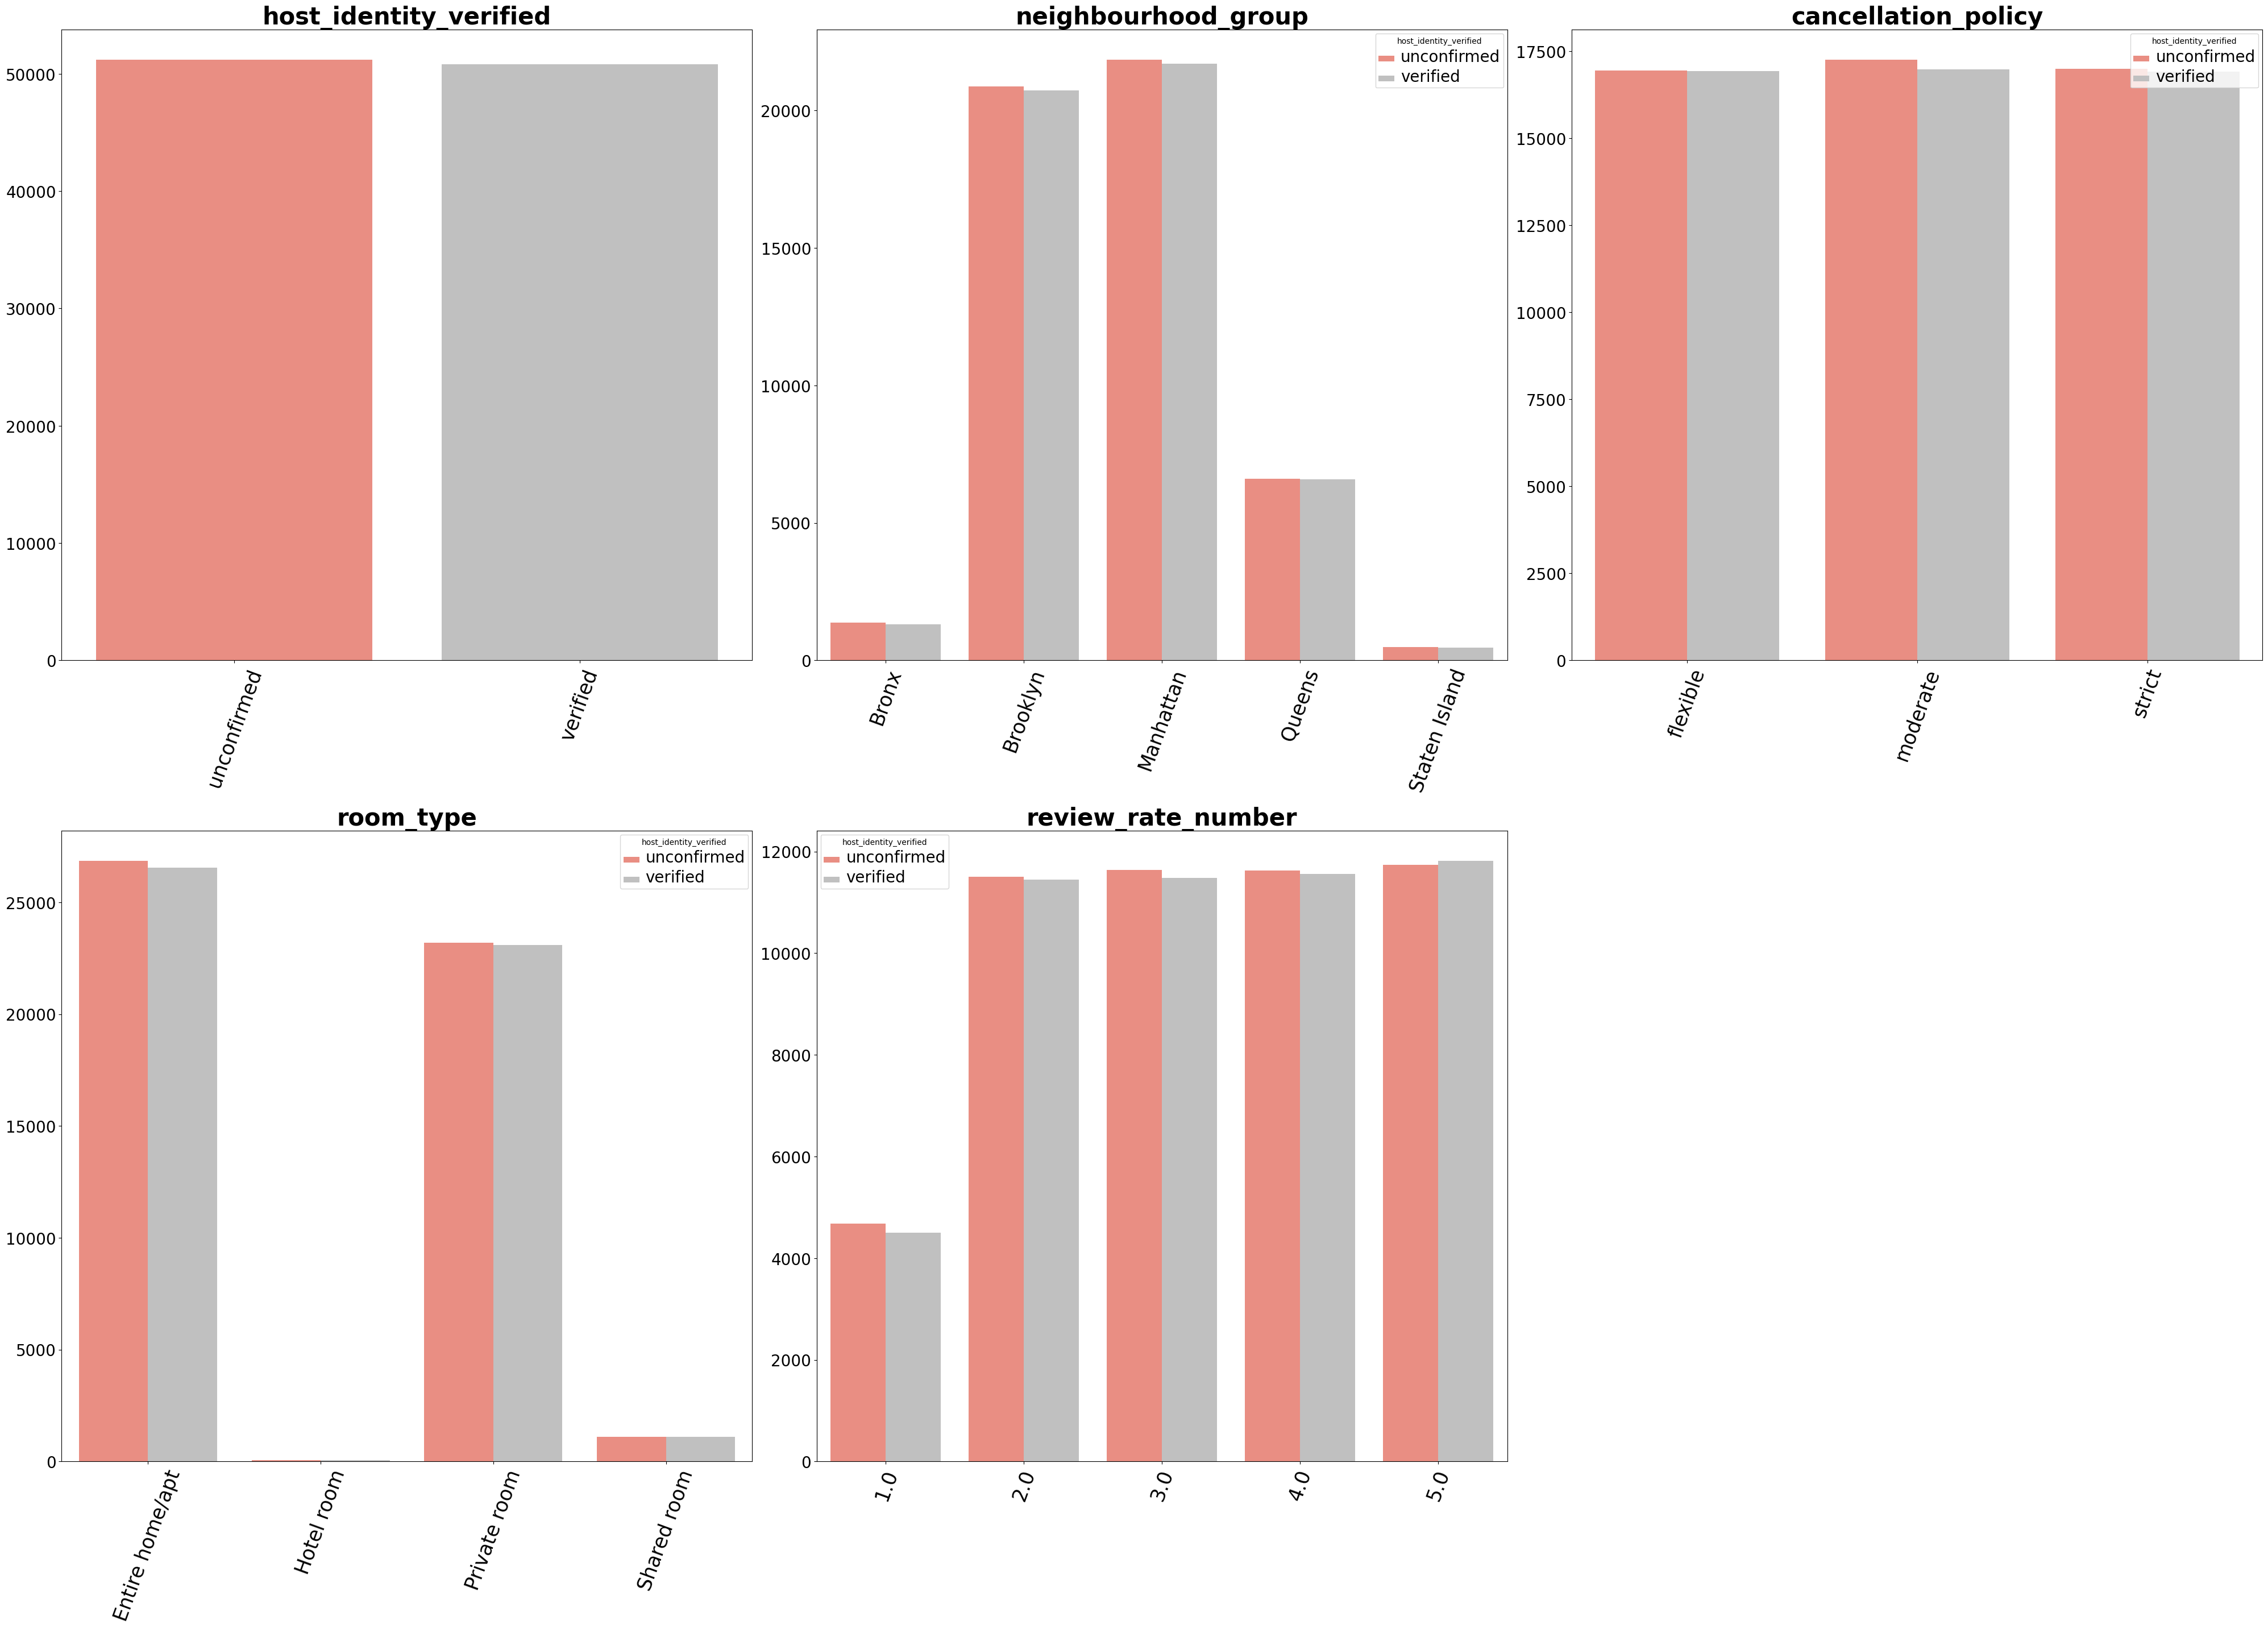

In [11]:
# define the category columns dataset
cat_df = df.select_dtypes(include=['category']) 

# Figure size
fig = plt.figure(figsize = (40,40))

# Countplot for cat columns
i = 1
for col in cat_df.columns:
    plt.subplot(3,3,i)
    ax = sns.countplot(data = cat_df, x = cat_df[col],hue = 'host_identity_verified', palette = ['salmon', 'silver'])
    ax.set(xlabel = None, ylabel= None)
    plt.title(col, loc='center', fontsize=30, fontweight='bold')
    plt.xticks(rotation = 70, fontsize = 25)
    plt.yticks(fontsize=20)
    legend = ax.get_legend()
    if legend:
        for text in legend.get_texts():
            text.set_fontsize(20)
    i+=1
    
# Adjust layout to prevent overlapping subplots   
plt.tight_layout()

# Save image before show plot
plt.savefig("Countplots.png", dpi=300, bbox_inches='tight')  

plt.show()

<H3> Box Plot Subplots: Examined spread and outliers in numerical variables.</H3>
<h4> There are quite many outliers in the below fields:_</h4>
<h5> <code>minimum_nights</code> <br>
    <code>number_of_reviews</code> <br>
    <code>reviews_per_month</code> <br>
     <code>calculated_host_listings_count</code> <br>
    <code>availability_365</code>:<br>
</h5>

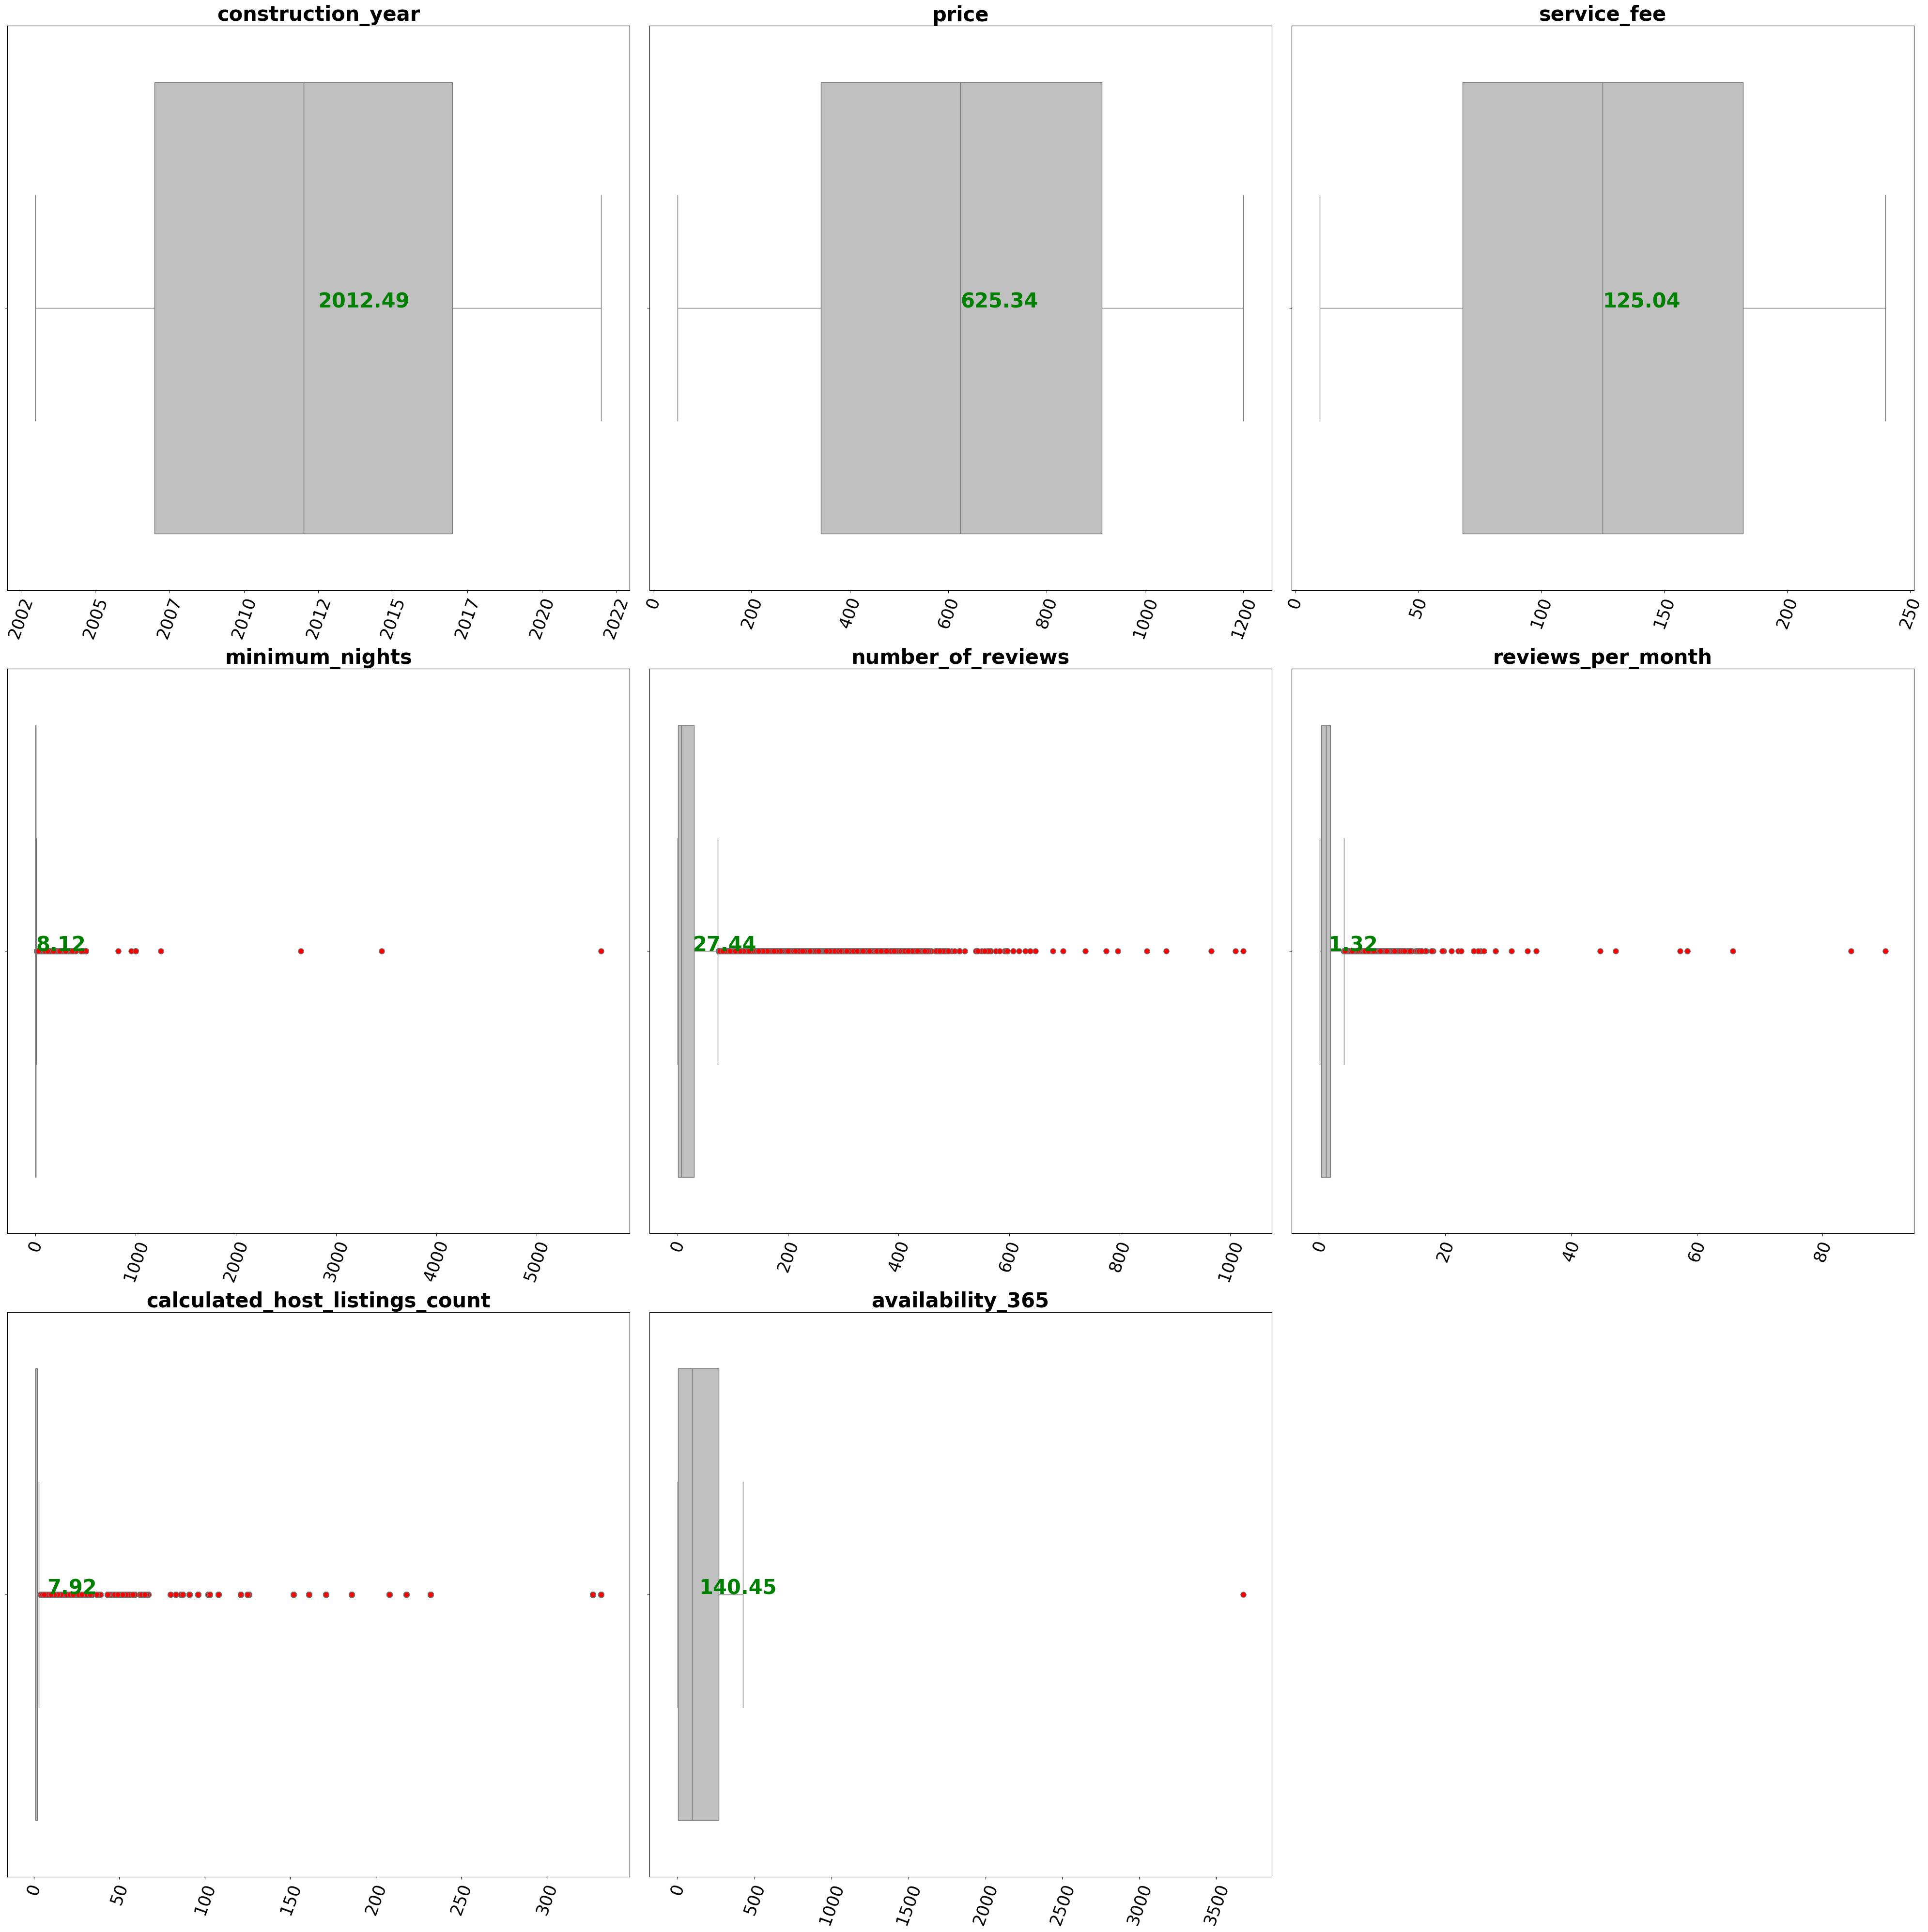

In [13]:
# Define the numeric dataset
flo_df = df[['construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month','calculated_host_listings_count',
       'availability_365']]

# Define plot size
fig = plt.figure(figsize = (40,40))

# Boxplot for flo columns
i = 1
for col in flo_df.columns:
    plt.subplot(3,3,i)
    ax = sns.boxplot(data = flo_df, x = flo_df[col], palette = ['silver'],
                    flierprops=dict(marker='o', markerfacecolor='red', markersize=8)) # Highlights outliers in red

    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x)}"))  # Rounds labels to whole numbers
    
    ax.set(xlabel = None, ylabel= None)
    plt.title(col,loc='center',fontsize=30, fontweight='bold')
    plt.xticks(rotation = 70, fontsize = 25)
    plt.yticks(fontsize=20)

    # Compute mean value
    mean_val = flo_df[col].mean()
    
    # Annotate mean value
    plt.text(mean_val, 0, f"{mean_val:.2f}", color="green", fontsize=30, fontweight='bold') 
   
    legend = ax.get_legend()
    if legend:
        for text in legend.get_texts():
            text.set_fontsize(20)
    i+=1

    
# Adjust layout to prevent overlapping subplots    
plt.tight_layout()

# Save image before show plot 
plt.savefig("Boxplot.png", dpi=300, bbox_inches='tight')  
plt.show()

<h3>Bar Chart: Top 30 Neighborhoods by Listings</h3>
<h4>Highlighted the most active areas based on listing counts. </h4>

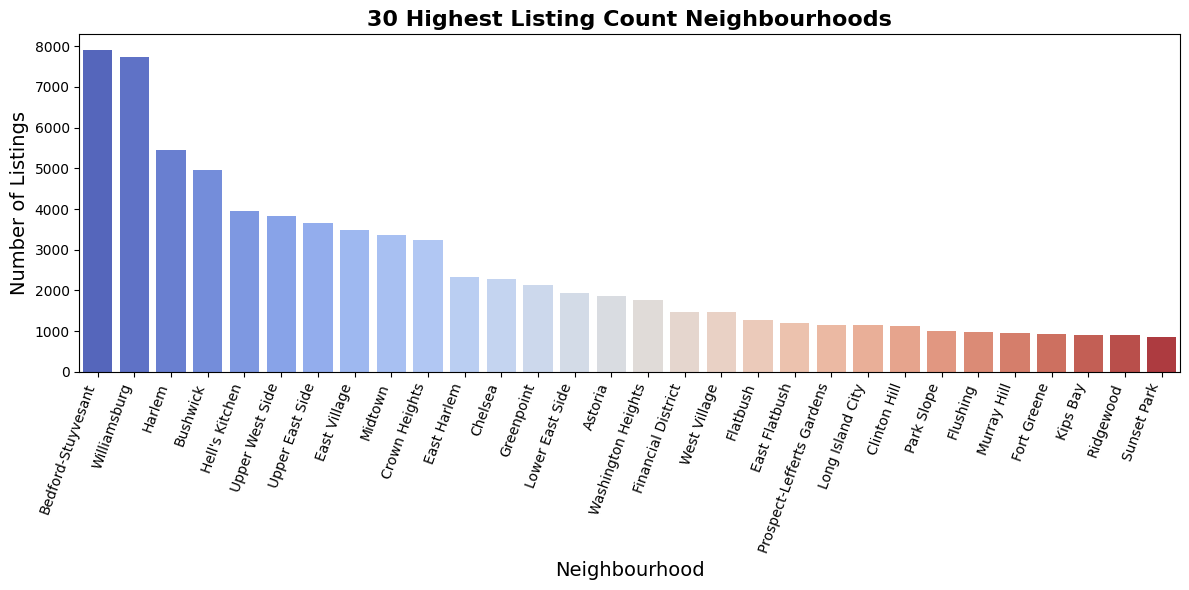

In [15]:
# Get top 30 neighbourhood values
nih_df_top30 = df['neighbourhood'].value_counts().head(30)

# Define plot size
plt.figure(figsize=(12, 6))

# Define color palette
palette = sns.color_palette("coolwarm", len(nih_df_top30))

# Create bar plot 
sns.barplot(x=nih_df_top30.index, y=nih_df_top30.values, palette=palette)


# Annotation Details
plt.xticks(rotation=70, ha='right') # Rotate x-axis labels for readability
plt.title("30 Highest Listing Count Neighbourhoods", fontsize=16, fontweight="bold")
plt.xlabel("Neighbourhood", fontsize=14)
plt.ylabel("Number of Listings", fontsize=14)

# Adjust layout to prevent overlapping   
plt.tight_layout()

# Save image before show plot 
plt.savefig("Barplot_top30.png", dpi=300, bbox_inches='tight')  

plt.show()


<h3>Stacked Histogram: Listing Price Distribution by Neighborhood Group </h3>
<h4>Compared price ranges across different neighborhood groups</h4>
The supply of each neighborhood group are quite evenly distributed across the minimum and maximum price range.

In [17]:
print(f"minimum listing price is {df['price'].min()}")
print(f"maximum listing price is {df['price'].max()}")

minimum listing price is 50.0
maximum listing price is 1200.0


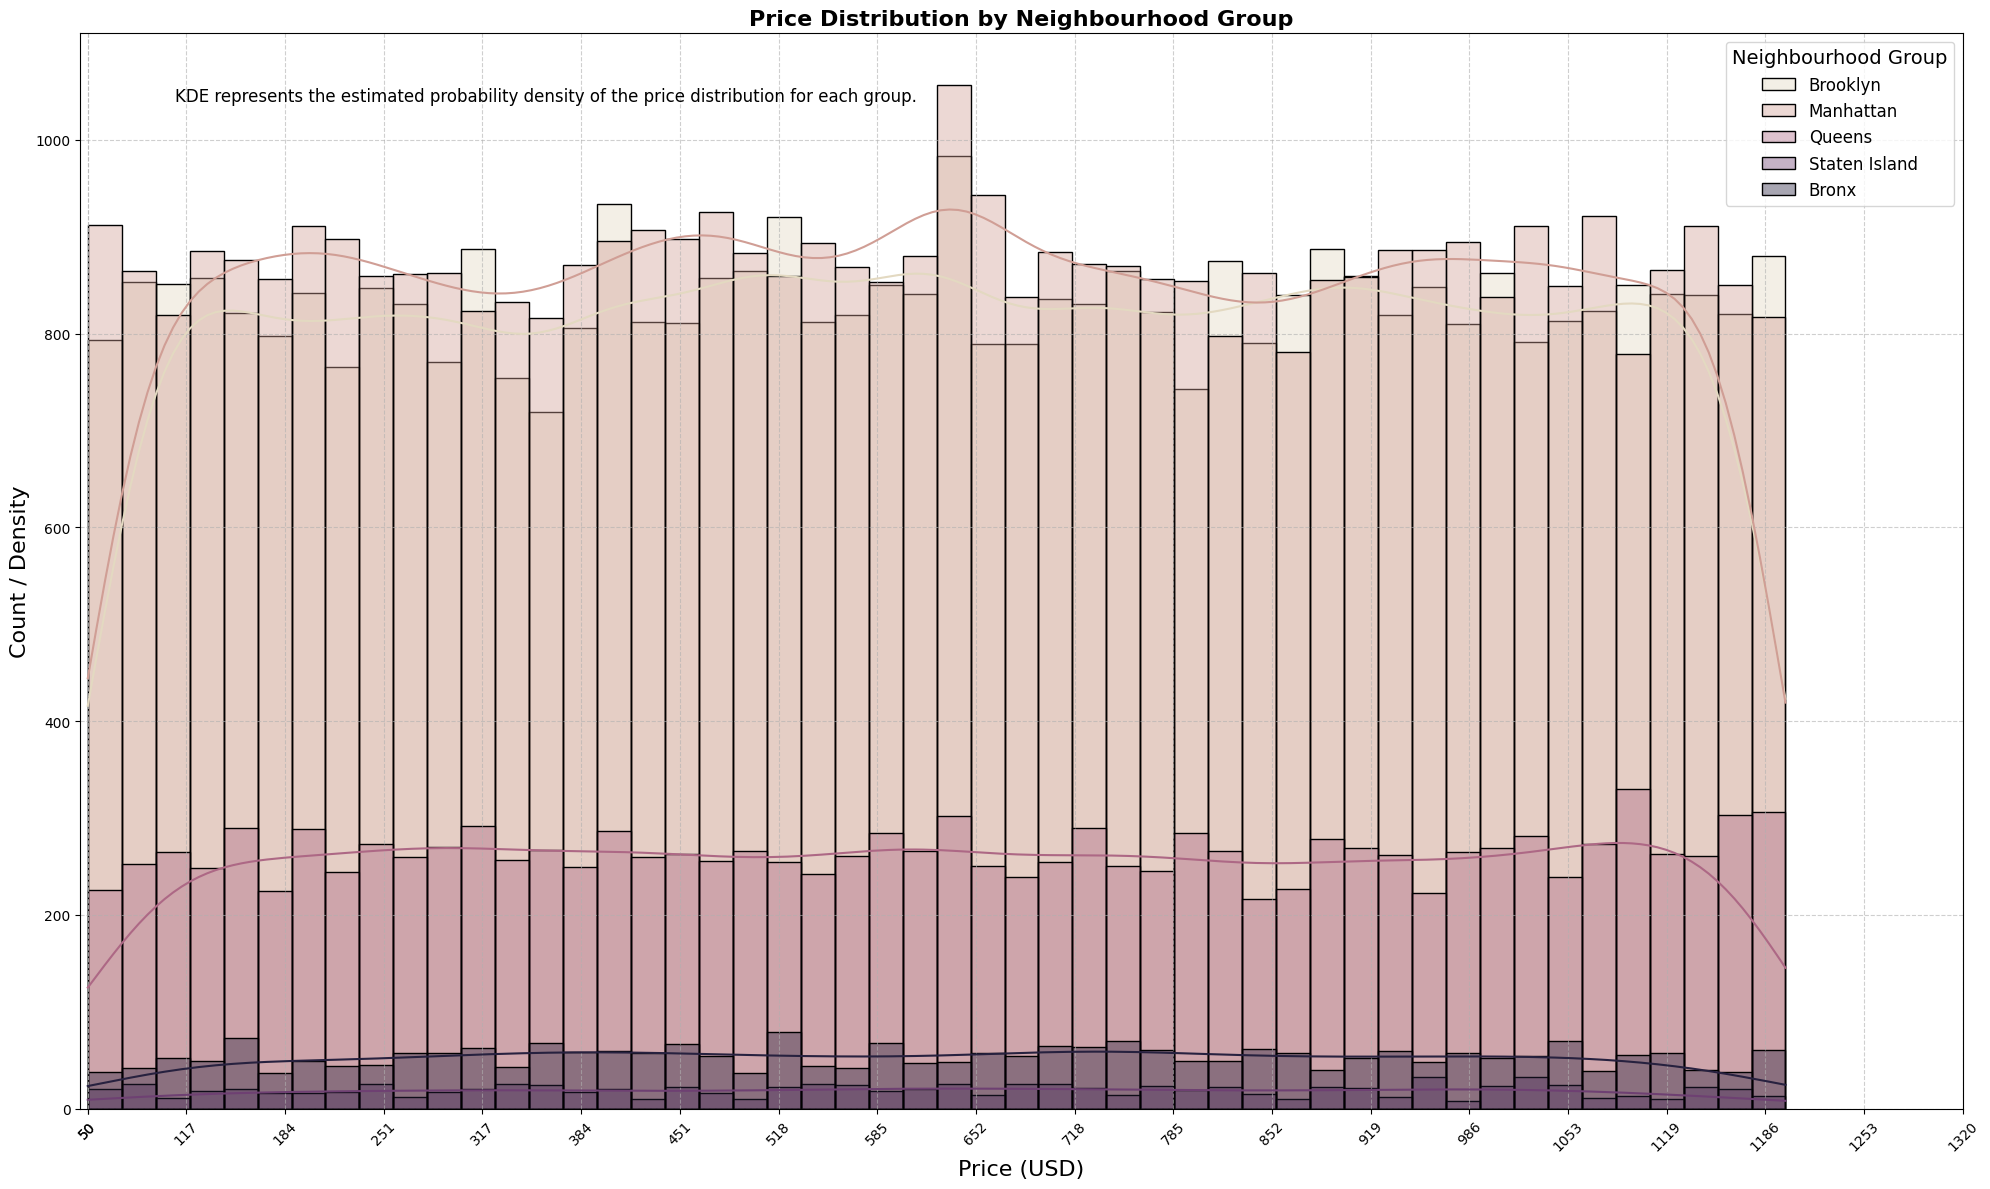

In [18]:
# Get unique neighbourhood groups
neighbourhood_groups = df['neighbourhood_group'].unique()


# Define plot size
plt.figure(figsize=(20,12))

# Define color palette
palette = sns.color_palette("ch:s=-.2,r=.6", len(neighbourhood_groups))

# Plot the histogram with KDE for each group separately
for i, group in enumerate(neighbourhood_groups):
    subset = df[df['neighbourhood_group'] == group]
    sns.histplot(data=subset, x='price', bins=50, kde=True, alpha=0.4, color=palette[i], label=group)


# Annotation Details
plt.title("Price Distribution by Neighbourhood Group", fontsize=16, fontweight="bold")
plt.xlabel("Price (USD)", fontsize=16)
plt.ylabel("Count / Density", fontsize=16) # Adjusted y-label to reflect KDE


# Set x-axis limits to start slightly before the minimum price for better visualization
min_price = df['price'].min()
max_price = df['price'].max()
plt.xlim((min_price * 0.9), max_price * 1.1) # Start at 90% of min price (or 0 if min is close to 0)
# add 10% padding beyond max price

# Define x-ticks to ensure minimum price is included
xticks = [min_price] + list(np.linspace(min_price, max_price * 1.1, num=20))  # Generate 20 evenly spaced tick values
plt.xticks(xticks, rotation=45)  # Rotate for better readability

plt.grid(True, linestyle='--', alpha=0.6) # Added linestyle and alpha for better grid

# Improve legend visibility
plt.legend(title='Neighbourhood Group', title_fontsize=14, fontsize=12, loc='upper right') # Adjusted font sizes

# Add a note about the KDE
plt.text(0.05, 0.95, "KDE represents the estimated probability density of the price distribution for each group.",
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left')

# Improve layout to prevent labels from being cut off
plt.tight_layout()

# Save before display plot
plt.savefig("Histogram_1.png", dpi=300, bbox_inches='tight')
plt.show()

<h3> Stacked Bar Chart: Listings by Year Built (per Neighborhood Group)</h3>
<h4>The age of listing home among the neighborhood groups are also evenly distributed as well</h4> 

In [20]:
df_b_yr_grouped = df.groupby(["construction_year", "neighbourhood_group"]).size()
df_b_yr_grouped.head()

construction_year  neighbourhood_group
2003.0             Bronx                   154
                   Brooklyn               2084
                   Manhattan              2153
                   Queens                  659
                   Staten Island            59
dtype: int64

<Figure size 1200x800 with 0 Axes>

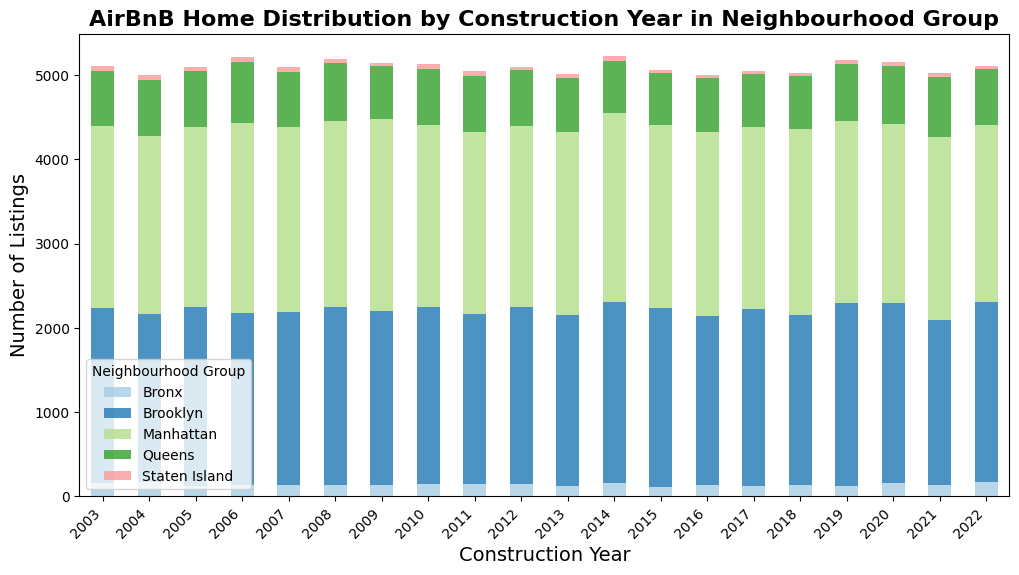

In [21]:
# Define data 
df_b_yr_grouped = df.groupby(["construction_year", "neighbourhood_group"]).size().unstack(fill_value=0)

# Figure Size
plt.figure(figsize=(12,8))

# Define color palette
colormap = sns.color_palette("Paired") 

# Create stacked bar plot 
ax = df_b_yr_grouped.plot(kind='bar', stacked=True, figsize=(12,6), color= colormap, alpha = 0.8)

# Annotation Details 
plt.title("AirBnB Home Distribution by Construction Year in Neighbourhood Group", fontsize=16, fontweight="bold")
plt.xlabel("Construction Year", fontsize=14)
plt.ylabel("Number of Listings", fontsize=14)

# Set x-axis ticks to display integers with proper alignment to right
ax.set_xticklabels(df_b_yr_grouped.index.astype(int), rotation=45, ha='right')

# Legend Title
plt.legend(title="Neighbourhood Group")

# Save figure before show plot
plt.savefig("StackedBar1.png", dpi=300, bbox_inches='tight')
plt.show()


<h3>Stacked Bar Chart: Room Type Distribution by Neighborhood Group</h3>
<h4>Observed how room types vary across locations.</h4>

In [23]:
#Define stacked barchart data
bar_data = df.groupby(["neighbourhood_group", "room_type"]).size() # Count of each roomtype by neighbourhood_group
bar_data.head()

neighbourhood_group  room_type      
Bronx                Entire home/apt     1020
                     Hotel room             0
                     Private room        1559
                     Shared room          115
Brooklyn             Entire home/apt    20469
dtype: int64

<Figure size 1000x2000 with 0 Axes>

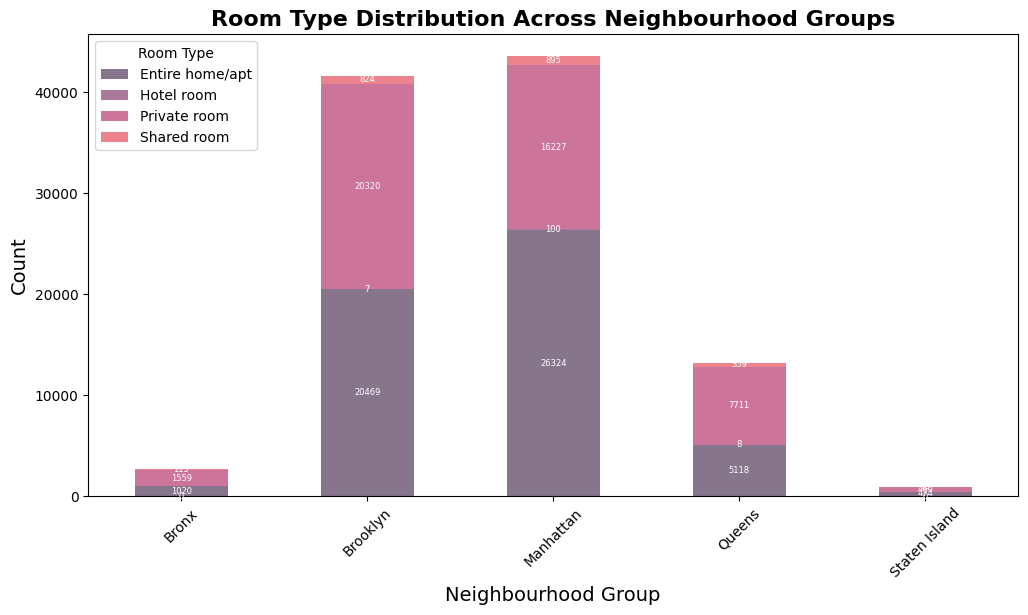

In [24]:
# Prepare data
bar_data = df.groupby(["neighbourhood_group", "room_type"]).size().unstack(fill_value=0)

# Figure size
plt.figure(figsize=(10, 20))

# Plot stacked bar chart
colormap = sns.color_palette("rocket") 
ax = bar_data.plot(kind='bar', stacked=True, figsize=(12,6), color= colormap,alpha =0.6)

# Add count labels on each segment
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='center', fontsize=6, color='white')

# Annotation Details
plt.title("Room Type Distribution Across Neighbourhood Groups", fontsize=16, fontweight="bold")
plt.xlabel("Neighbourhood Group", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)

#Legend title and alignment 
plt.legend(title="Room Type",loc ="upper left")

# Save plot before show 
plt.savefig("StackedBar2.png", dpi=300, bbox_inches='tight')  
plt.show()


<h4> Now we know most listing are in Manhattan and Brooklyn. Manhattan has more Entire home listing while Brooklyn has more Private Room listing.  </h4>

<H3>Correlation Heatmap (sns.heatmap)</H3>
<h4>Explored relationships between numeric features such as price, reviews, availability, and more.</h4>
- Results showing that the price and service fee are highly correlated. We will study more later on.

In [27]:
corr_matrix = flo_df.corr(method="pearson")
corr_matrix

,construction_year,price,service_fee,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
construction_year,1.000000,-0.003925,-0.003607,-0.001035,0.001743,0.003713,-0.002679,-0.008592
price,-0.003925,1.000000,0.997824,-0.002802,0.005203,0.004204,-0.000087,-0.002756
service_fee,-0.003607,0.997824,1.000000,-0.002984,0.005097,0.004094,0.000059,-0.003097
minimum_nights,-0.001035,-0.002802,-0.002984,1.000000,-0.050676,-0.084807,0.084972,0.058505
number_of_reviews,0.001743,0.005203,0.005097,-0.050676,1.000000,0.591964,-0.080537,0.098113
reviews_per_month,0.003713,0.004204,0.004094,-0.084807,0.591964,1.000000,-0.026742,0.072296
calculated_host_listings_count,-0.002679,-0.000087,0.000059,0.084972,-0.080537,-0.026742,1.000000,0.158765
availability_365,-0.008592,-0.002756,-0.003097,0.058505,0.098113,0.072296,0.158765,1.000000


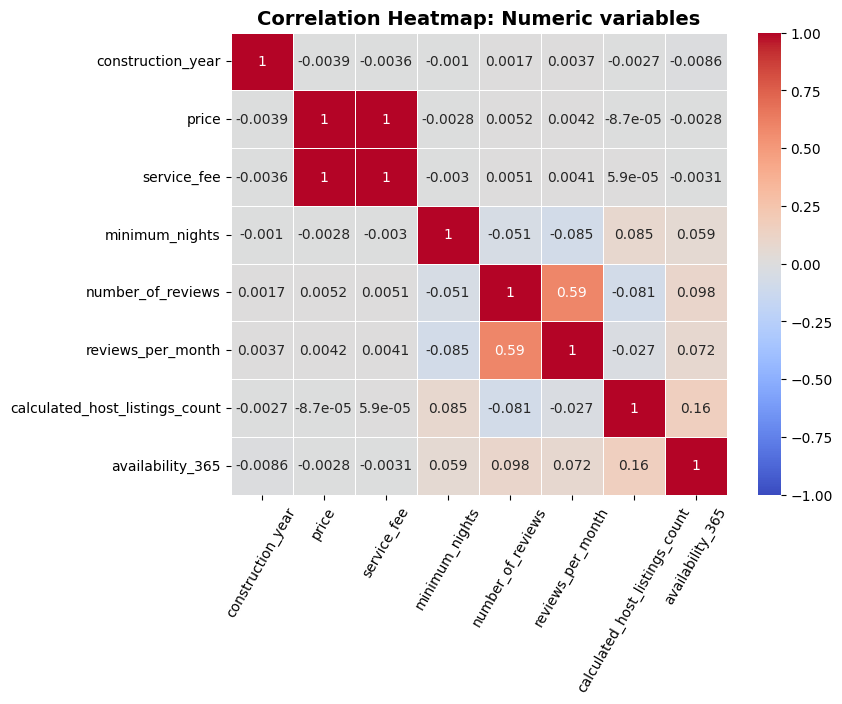

In [28]:
# Define plot size
plt.figure(figsize=(8, 6))

# Create heatmap with plot details
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)

# Annotation Details 
plt.title("Correlation Heatmap: Numeric variables", fontsize=14, fontweight="bold")
plt.xticks(rotation=60)
plt.yticks(rotation=0)

# Save image before show plot 
plt.savefig("Heatmap2.png", dpi=300, bbox_inches='tight')  
plt.show()


<h3> Scatter Plot: Price vs. Service Fee</h3>
<h4>Investigated the relationship between listing price and service fees.</h4>
It seems there are 3 types of calcuation method in the service fee charged. <br>
<b>Fixed Service Fees</b>: (Vertical line in the plot)<br>
Regardless the listing price, a fix amount of service fee will be imposed.<br>
<b>Fix rates multiply Listing Price</b>: (Diagonal line in the plot)<br>
Where Service Fee = Price x fixed rate.<br>
<b>Variable Service charge with specific Listing Price</b>: (Horizontal line in the plot)<br>
When Listing price at around $620, a variable service fee will be imposed<br>
<br>
<b>Other findings</b>: Also, the Diagnoal line are heavily overlapped, which also means this is the most popular menthod of calculating service fees

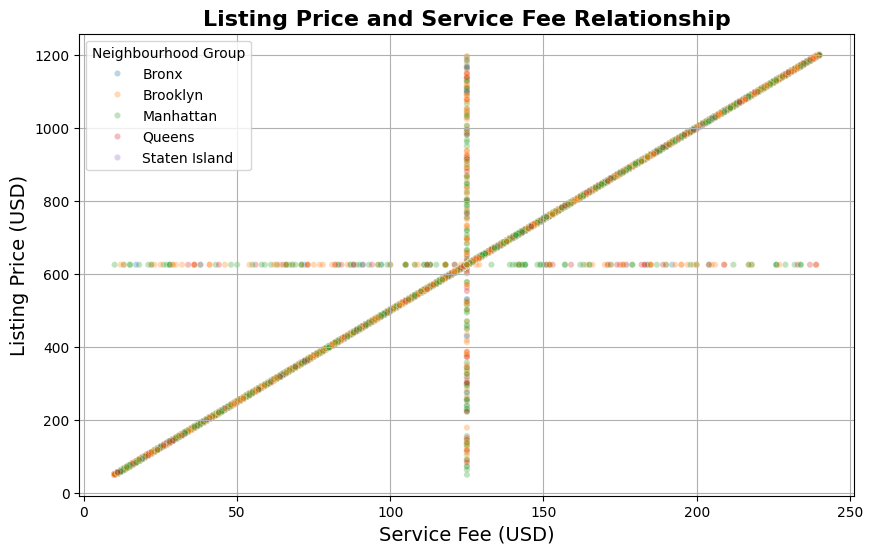

In [30]:
# Define plot size
plt.figure(figsize =(10,6))

# Create Scatter Plot
sns.scatterplot(x=df['service_fee'],y=df['price'],hue=df['neighbourhood_group'], alpha=0.3, s=20)

# Annotation Details 
plt.title("Listing Price and Service Fee Relationship", fontsize=16, fontweight="bold")
plt.xlabel("Service Fee (USD)", fontsize=14)
plt.ylabel("Listing Price (USD)", fontsize=14)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.grid(True)

# Legend placement (Try 'best' or other locations)
plt.legend(title='Neighbourhood Group', loc='best')

# Save image before show plot
plt.savefig("Scatter1.png", dpi=300, bbox_inches='tight')
plt.show()

<h3>Word Cloud: House Rules</h3>
<h4>Visualized most common phrases in the house rules section.</h4>

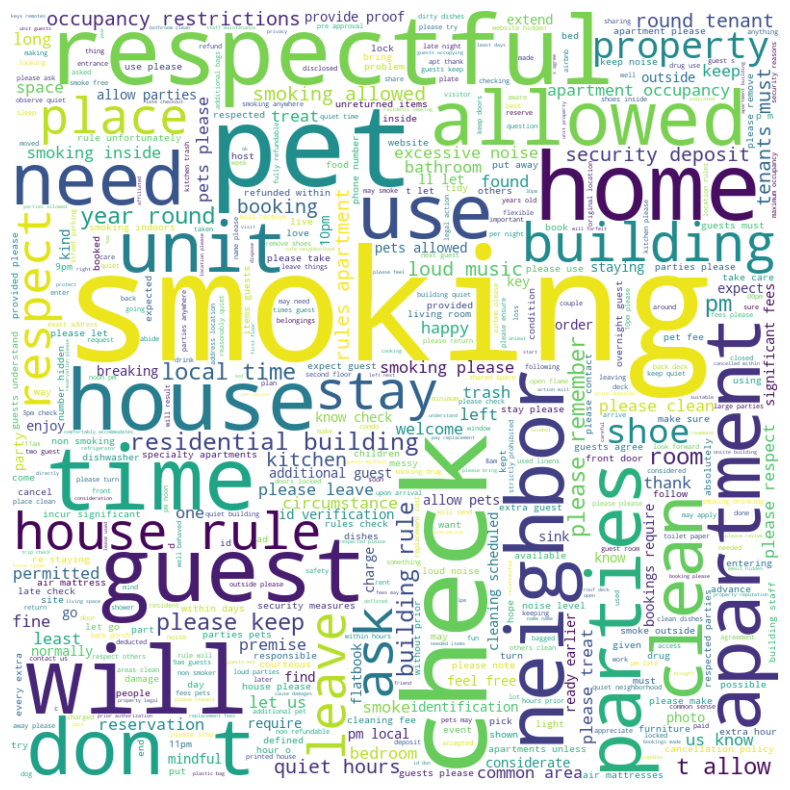

In [32]:
from wordcloud import WordCloud, STOPWORDS

# Define custom stopwords (Add words to exclude appearing in final result)
stopwords = set(STOPWORDS)  # Initialize predefined stopwords from WordCloud
stopwords.update(['no', 'will', 'thanks','allow','please','specific', 'rules', 'provided', 'must', 'allowed','.'])  


# Preprocess text: Convert text to lowercase and remove stopwords
filtered_text = " ".join([
    word.lower() for word in df['house_rules'] 
    if word not in stopwords and word != 'No specific rules provided'
])
# Create the word cloud
wordcloud = WordCloud(width=800, height=800, # Dimensions of word cloud image
                      max_words=500,  # Max number of words in visualization
                      background_color='white', # set background color
                      colormap='viridis' # select colormap
                     ).generate(filtered_text) 

# Display the word cloud
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear') # For smooth visuals
plt.axis('off') # Hide axis for a cleaner display

# Save image before show plot
plt.savefig("WordCloud.png", dpi=300, bbox_inches='tight')  
plt.show()